In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import *
from sympy.physics.mechanics import *
from sympy import sqrt, Rational

# enable LaTeX printing
init_vprinting()

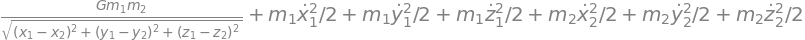

In [5]:
# create symbolic variables
m_1, m_2, G, t = symbols('m_1 m_2 G t')

# dynamic symbols
x_1, y_1, z_1, x_2, y_2, z_2 = dynamicsymbols('x_1 y_1 z_1 x_2 y_2 z_2')

def mag(x, y, z):
    mean = sqrt(x**2 + y**2 + z**2)
    return mean

# calculate distance d:
d = mag((x_2 - x_1), (y_2 - y_1), (z_2 - z_1))

# derivatives
x_1_dot = diff(x_1, t)
x_1_ddot = diff(x_1_dot, t)

x_2_dot = diff(x_2, t)
x_2_ddot = diff(x_2_dot, t)

y_1_dot = diff(y_1, t)
y_1_ddot = diff(y_1_dot, t)

y_2_dot = diff(y_2, t)
y_2_ddot = diff(y_2_dot, t)

z_1_dot = diff(z_1, t)
z_1_ddot = diff(z_1_dot, t)

z_2_dot = diff(z_2, t)
z_2_ddot = diff(z_2_dot, t)

# Lagrangian
T = Rational(1,2)*(m_1*(mag(x_1_dot, y_1_dot, z_1_dot))**2 + m_2*(mag(x_2_dot, y_2_dot, z_2_dot))**2)
V = -G*(m_1*m_2)/d
L = T - V

# Simplify the Lagrangian
L = simplify(L)
L

In [7]:
# Euler-Lagrange Equation
eqn_1 = diff(diff(L, x_1_dot), t) - diff(L, x_1)
eqn_2 = diff(diff(L, x_2_dot), t) - diff(L, x_2)
eqn_3 = diff(diff(L, y_1_dot), t) - diff(L, y_1)
eqn_4 = diff(diff(L, y_2_dot), t) - diff(L, y_2)
eqn_5 = diff(diff(L, z_1_dot), t) - diff(L, z_1)
eqn_6 = diff(diff(L, z_2_dot), t) - diff(L, z_2)
sln = solve([eqn_1, eqn_2, eqn_3, eqn_4, eqn_5, eqn_6], [x_1_ddot, x_2_ddot, y_1_ddot, y_2_ddot, z_1_ddot, z_2_ddot])

# show the solution
f = Matrix([x_1_dot, sln[x_1_ddot], x_2_dot, sln[x_2_ddot], y_1_dot, sln[y_1_ddot], y_2_dot, sln[y_2_ddot], z_1_dot, sln[z_1_ddot], z_2_dot, sln[z_2_ddot]])
f = simplify(f)
x = Matrix([x_1, x_1_dot, x_2, x_2_dot, y_1, y_1_dot, y_2, y_2_dot, z_1, z_1_dot, z_2, z_2_dot])
x_dot = diff(x, t)

Eq(x_dot, f)

       ⎡                                 x₁̇                                 ⎤
       ⎢                                                                    ⎥
       ⎢                          G⋅m₂⋅(-x₁ + x₂)                           ⎥
       ⎢────────────────────────────────────────────────────────────────────⎥
       ⎢                                                                 3/2⎥
       ⎢⎛  2               2     2               2     2               2⎞   ⎥
       ⎢⎝x₁  - 2⋅x₁⋅x₂ + x₂  + y₁  - 2⋅y₁⋅y₂ + y₂  + z₁  - 2⋅z₁⋅z₂ + z₂ ⎠   ⎥
       ⎢                                                                    ⎥
       ⎢                                 x₂̇                                 ⎥
       ⎢                                                                    ⎥
       ⎢                           G⋅m₁⋅(x₁ - x₂)                           ⎥
       ⎢────────────────────────────────────────────────────────────────────⎥
⎡x₁̇⎤   ⎢                                                     

In [24]:
g = f.subs({x_1: 'x_1', x_1_dot: 'x_1_dot', x_2: 'x_2', x_2_dot: 'x_2_dot', y_1: 'y_1', y_1_dot: 'y_1_dot', y_2: 'y_2', y_2_dot: 'y_2_dot', z_1: 'z_1', z_1_dot: 'z_1_dot', z_2: 'z_2', z_2_dot: 'z_2_dot'})
ODE=[]
for i in range(12):
    ODE.append(g[i])
    print('f[{}] = {}'.format(i, g[i]))
ODE = tuple(ODE)
%store ODE


f[0] = x_1_dot
f[1] = G*m_2*(-x_1 + x_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
f[2] = x_2_dot
f[3] = G*m_1*(x_1 - x_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
f[4] = y_1_dot
f[5] = G*m_2*(-y_1 + y_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
f[6] = y_2_dot
f[7] = G*m_1*(y_1 - y_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
f[8] = z_1_dot
f[9] = G*m_2*(-z_1 + z_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
f[10] = z_2_dot
f[11] = G*m_1*(z_1 - z_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
Stored 'ODE' (tuple)
